## Matplotlib API入门

### Figure和Subplot

#### matplotlib的图像都位于Figure对象中,可以使用plt.figure创建一个新的Figure

In [1]:
import numpy as np
from pandas import DataFrame,Series
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline

In [3]:
np.random.seed(0)
fig = plt.figure()

#### figure会创建一个空白窗口.figure有一些选项,特别是figsize,它用于确保当前图片保存到磁盘时具有一定的大小和纵横比.matplotlib中的figure还支持一种matlab式的编号架构(例如plt.figure(2)),通过plt.gcf()即可得到当前Figure的引用

#### 不能通过空Figure绘图.必须用add_subplot创建一个或多个subplot
#### 本条代码的意思是:创建一个2*2的图像,且当前选中的是4个subplot中的第一个(编号从1开始)

In [4]:
ax1 = fig.add_subplot(2, 2, 1)

#### 如果把后面的subplot也创建出来,最终会得到一个完整的图像

In [5]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#### 如果这时发出一条绘图命令(如plt.plot([1.5,3.5,-2,1.6])),matplotlib就会在最后一个用过的subplot上进行绘制,

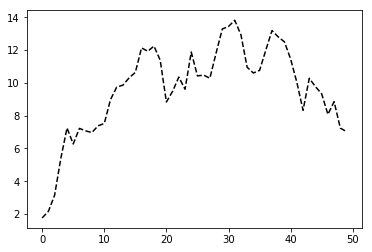

In [6]:
plt.plot(np.random.randn(50).cumsum(),'k--')


#### 'k--'是一个线性选项,用于告诉matplotlib绘制黑色虚线图.上面那些由fig.add_subplot所返回的对象是AxesSubplot对象,直接调用它们的实例方法可以在其他空着的格子里面画图

In [7]:
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

#### 可以在matplotlib的文档中找到各种图标类型.由于根据特定布局创建figure和subplot是一件非常常见的任务,于是便出现了一个更为方便的方法(plt.subplots),它可以创建一个新的figure,并返回一个含有已创建的subplot对象的numpy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FEB8ADA438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002FEB8CCAD68>]], dtype=object)

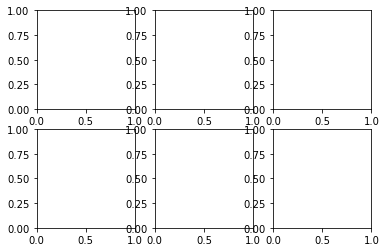

In [8]:
fig,axes = plt.subplots(2,3)
axes

#### 这是非常使用的,因为可以轻松地对axes数组进行索引,就好像是一个二维数组一样,例如,axes[0,1].还可以通过sharex和sharey指定subplot应该具有相同的x轴或y轴.在比较相同范围的数据时,这也是非常实用的,否则,matplotlib会自动缩放各图标的界限

### 调整Subplot周围的间距
#### 默认情况下,matplotlib会在subplot外围留下一定的边距,并在subplot之间留下一定的间距.间距跟图像的高度和宽度有关,因此,如果调整了图像大小(不管是编程还是手工),间距也会自动调整.利用figure的subplots_adjust方法可以轻而易举地修改间距
subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
#### wspace和hspace用于控制宽度和高度的百分比,可以用作subplot之间的间距

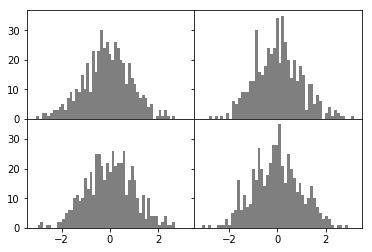

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色,标记和线型
#### matplotlib的plot函数接受一组x和y坐标,还可以接受一个表示颜色和线性的字符串缩写
#### 线型图还可以加上一些标记(marker),以强调实际的数据点.由于matplotlib创建的是连续的线型图(点与点之间插值),因此有时可能不太容易看出真是数据点的位置.标记也可以放到格式字符串中,但标记类型和线性必须放在颜色后面

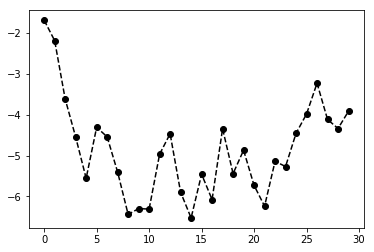

In [10]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

#### 以上代码还可以将其些微更为明确的形式

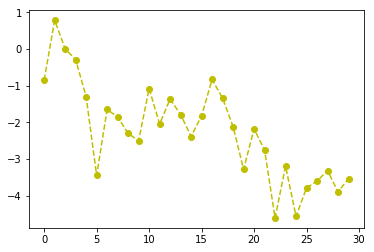

In [11]:
plt.plot(np.random.randn(30).cumsum(),color='y',linestyle='dashed',marker='o')

#### 在线型图中,非实际数据点默认是按线性方式插值的.可以通过drawstyle选项修改

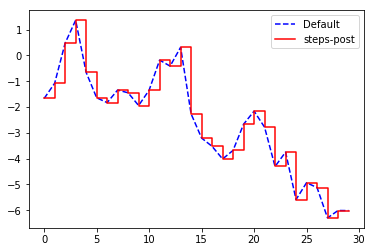

In [12]:
data = np.random.randn(30).cumsum()
plt.plot(data,'b--',label='Default')
plt.plot(data,'r-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### 刻度,标签和图例
#### 对于大多数的图标装饰项,其主要实现方式有二:使用过程型的pyplot接口(matlab用户非常熟悉)以及更为面向对象的原生matplotlibAPI
#### pyplot接口的设计目的就是交互式使用,含有诸如xlim,xticks和xticklabels之类的方法,它们分别控制图标的范围,刻度位置,刻度标签等,其使用方法有一下两种:
- 范围调用时不带参数,则返回当前的参数值.例如.plt.xlim返回当前的新轴绘图范围
- 调用时带参数,则设置参数值.因此plt.xlim([0,10])会将新轴的范围设置为0到10

## 设置标题,轴标签,刻度以及刻度标签


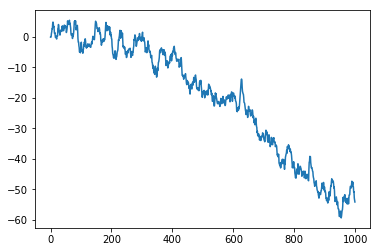

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

#### 要修改X轴刻度,最简单的办法是使用set_xticks和set_xticklabels.前者告诉matplotlib要将刻度放在数据范围中的哪些位置,默认情况下,这些位置也就是刻度标签,我们可以通过set_xticklabels将任何其他的值用作标签

In [14]:
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')

In [15]:
#### 用set_xlable为x轴设置一个名称,并用set_title设置一个标题

In [16]:
ax.set_title('my first matplotlib plot')
ax.set_xlabel('stages')

### 添加图例

#### 图例(legend)是另一种用于表示图标元素的重要工具.添加图里的方式有二,最简单的是在添加subplot的时候传入label,之后调用ax.legend()或plt.legend()来自动创建图例

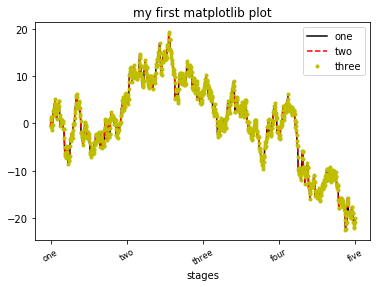

In [17]:
data = np.random.randn(1000).cumsum()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('my first matplotlib plot')
ax.set_xlabel('stages')
ax.plot(data,'k',label='one')
ax.plot(data,'r--',label='two')
ax.plot(data,'y.',label='three')
ax.legend(loc='best')

####  loc可以告诉matploylib要将图里放在哪.一般来说'best'是不错的选择,因为它会选择最不碍事的位置.要从图例中去除一个或多个元素,不传入label或传入label='_nolegend_'即可

### 注解以及在subplot上绘图
#### 注解可以通过text,arrow和annotate等函数进行添加.text可以将文本绘制在图标的指定坐标(x,y),还可以加上一些自定义格式
#### 注解中可以既含有文本也含有箭头

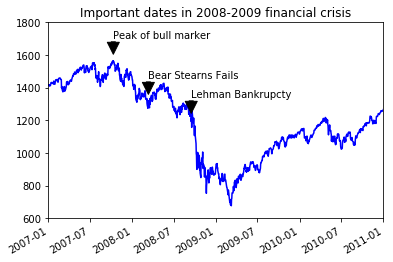

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('D:\AnalysisDataWithPython\data\examples\spx.csv',index_col=0,parse_dates=True)
spx=data['SPX']
spx.plot(ax=ax,style='b-')
crisis_data={
    (datetime(2007,10,11),'Peak of bull marker'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankrupcty')
}
for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+50),
               xytext=(date,spx.asof(date)+200),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left', verticalalignment='top')
# 放大到2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

#### 图形的绘制要麻烦一些,matplotlib有一些表示常见图形的对象.这些对象被称为块(patch),其中有些可以在matplotlib.pyplot中找到(如Rectangle和Circle),但完整集合位于matplotlib.patches
#### 要在图表中添加一个图形,需要创建一个块对象shp,然后通过ax.add_patch(shp)将其添加到subplot中

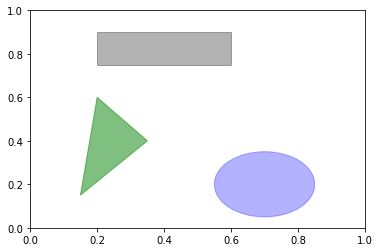

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件
#### 利用plt.savefig可以将当前图标保存到文件.该方法相当于figure对象的实例方法savefig.
#### 文件类型是通过文件扩展名推断出来的,在保存图片时最重要的选项是dpi(控制"每英寸点数"分辨率)和bbox_inches(可以剪除当前图表周围的空白部分)
plt.savefig('figpath.png',dpi=400,bbox_inches='tight)
#### savefig除了写入磁盘,也可以写入任何文件型的对象,比如StringIO
from ip import StringIO
buffer = StringIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
#### 这种特性对在web上提供动态生成的图片是很实用的
### figure.savefig的选项
|参数|说明|
|:---|:---|
|fname|含有文件路径的字符串或Python的文件型对象.图像格式由文件扩展名推断得出,例如,.pdf推断出PDF,.png推断出PNG|
|dpi|图像分辨率(每英寸点数),默认为100|
|facecolor,edgecolor|图像的背景色,默认为'w'(白色)|
|format|显式设置文件格式('png','pdf','svg','ps','eps'...)|
|bbox_inches|图表需要保存的部分.如果设置为'tight',则将尝试剪除图表周围的空白部分|

### matplotlib配置
#### matplotlib自带一些配色方案,以及生成出版质量的图片而设定的默认配置信息.幸运的是,几乎所有默认行尾都能通过一组全局参数进行自定义,它们可以管理图像大小,subplot边距,配色方案,字体大小,网格类型等等

#### 要将全局的图像默认大小设置为10*10,可以执行:
plt.rc('figure',figsize=(10,10))
#### rc的第一参数是希望自定义的对象,如'figure','axex','xtick','ytick','grid','legend'等.其后可以跟上一系列的关键字参数.最简单的办法是将这些选项写成一个字典
font_options = {
    'family':'monospace',
    'weight':'bold',
    'size':'small'
}
plt.rc('font',**font_options)

### pandas中的绘图函数

#### 在pandas中,有行标签,列标签以及分组信息.pandas有许多能够利用df对象数据组织特点来创建标准图表的高级绘图方法

### 线型图
#### Series和DF都有一个用于生成各类图表的plot方法.默认情况下,它们所生成的是线型图

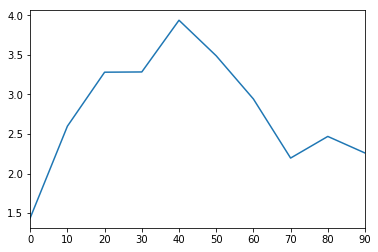

In [20]:
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

#### 该Series对象的索引会被传给matplotlib,并用以绘制x轴,可以通过use_index=False禁用该功能.X轴的刻度和界限可以通过xticks和xlim选项进行调节,y轴就用yticks和ylim.
#### pandas的大部分绘图方法都有一个可选的ax参数,它可以是一个matplotlib的subplot对象
#### DF的plot方法会在一个subplot中为各列绘制一条线,并自动创建图例

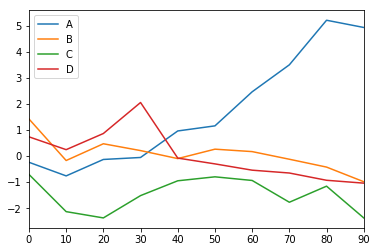

In [21]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df.plot()

### Series.plot方法的参数
|参数|说明|
|:---|:---|
|label|用于图例的标签|
|ax|要在其上进行绘制的matplotlib subplot对象,如果没有设置,则使用当前matplotlib subplot|
|style|将要传给matplotlib的风格字符串(如'ko--')|
|alpha|图表的填充不透明度|
|kind|可以是'line','bar','barh','kde'|
|logy|在y轴上使用对数标尺|
|use_index|将对象的索引用作刻度标签|
|rot|旋转刻度标签(0到360)|
|xticks|用作x轴刻度的值|
|yticks|用作y轴刻度的值|
|xlim|x轴的界限(例如[0,10])|
|ylim|y轴的界限|
|grid|显示轴网格线(默认打开)|

### 专用于DF的plot的参数
|参数|说明|
|:---|:---|
|suplots|将各个DF列绘制到单独的subplot|
|sharex|如果subplots=True,则共用同一个x轴,包括刻度和界限|
|sharey|如果subplot=True,则共用同一个Y轴|
|figsize|表示图像大小的元组|
|title|表示图像表土的字符串|
|legend|添加一个subplot图例(默认为True)|
|sort_columns|以字母顺序绘制各列,默认使用当前列顺序|

### 柱状图
#### 在生成线型图的代码中加上kind='bar'(垂直柱状图)或kind='barh'(水平柱状图)即可生成柱状图.这时,Series和DF的索引将会被用作X(bar)或Y(barh)刻度

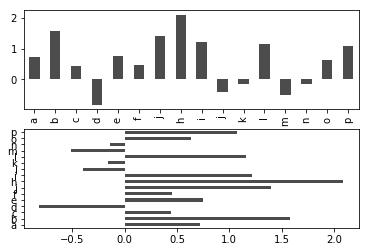

In [22]:
fig,axes = plt.subplots(2,1)
data = Series(np.random.randn(16),index=list('abcdefjhijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

#### 对于DF,柱状图会将每一行的值分伪一组

In [23]:
df = DataFrame(np.random.rand(6,4),
              index=['one','two','three','four','five','siz'],
              columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.439202,0.504685,0.896052,0.877674
two,0.179084,0.849009,0.509739,0.106118
three,0.311484,0.686946,0.893434,0.108350
four,0.609653,0.678129,0.276177,0.756641
five,0.103328,0.239677,0.000491,0.502738
siz,0.263436,0.078067,0.880881,0.198665


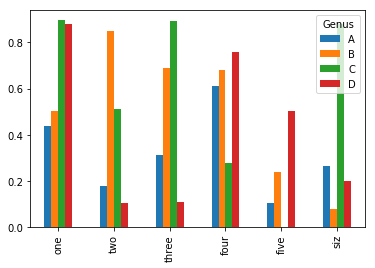

In [24]:
df.plot(kind='bar')

##### 注意,DF各列的名称’Genus'被用做了图例的标题.设置stacked=True即可为DF生成堆积柱状图,这样每行的值就会被堆积在一起 

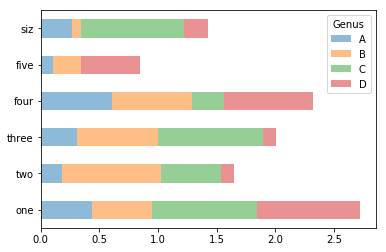

In [25]:
df.plot(kind='barh',stacked=True,alpha=0.5)

In [26]:
tips = pd.read_csv('D:/AnalysisDataWithPython/data/examples/tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [27]:
party_counts = party_counts.iloc[:,2:5]

#### 数据规整化,使得各行的和为1,并生成图表

In [28]:
party_counts = party_counts.div(party_counts.sum(1).astype(float),axis=0)
party_counts

size,3,4,5
day,,,
Fri,0.500000,0.50000,0.000000
Sat,0.562500,0.40625,0.031250
Sun,0.416667,0.50000,0.083333
Thur,0.400000,0.50000,0.100000


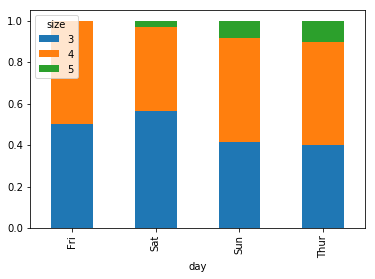

In [29]:
party_counts.plot(kind='bar',stacked=True)

### 直方图和密度图

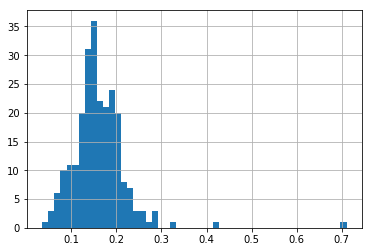

In [30]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)

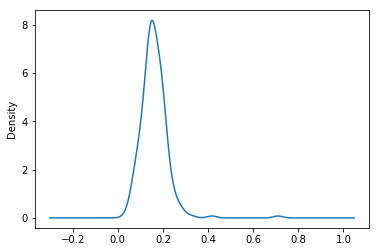

In [31]:
tips['tip_pct'].plot(kind='kde')

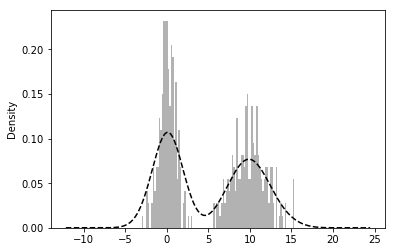

In [32]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,alpha=0.3,color='k',normed=True)
values.plot(kind='kde',style='k--')

### 散布图
#### 散布图是观察两个一维数据序列至阿健的关系的有效手段

In [33]:
macro = pd.read_csv('D:\AnalysisDataWithPython\data\examples\macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [34]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


#### 利用plt.scatter绘制一张简单的散布图

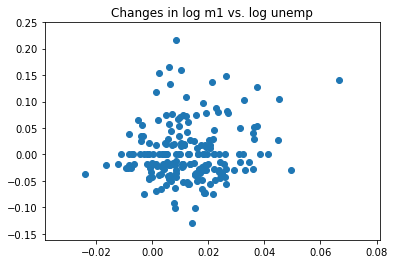

In [35]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Changes in log %s vs. log %s'%('m1','unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FEBB5FB668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002FEBCB7F9B0>]], dtype=object)

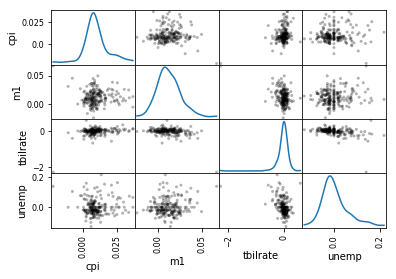

In [36]:
pd.plotting.scatter_matrix(trans_data,diagonal='kde',c='k',alpha=0.3)

### 绘制地图

In [37]:
data = pd.read_csv('D:\AnalysisDataWithPython\data\dataSets\haiti\Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [38]:
data[['INCIDENT DATE','LATITUDE','LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [39]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [40]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


#### 清除错误位置信息并移除缺失分类信息

In [41]:
data = data[(data['LATITUDE']>18)&(data['LATITUDE']<20)&
           (data['LONGITUDE']>-75)&(data['LONGITUDE']<-70)&
           (data['CATEGORY'].notnull())]

In [42]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [43]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [44]:
all_cats = get_all_categories(data['CATEGORY'])

In [45]:
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [46]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data),len(code_index))),index=data.index,columns=code_index)
dummy_frame.iloc[:,:6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [54]:
for row ,cat in zip(data.index,data['CATEGORY']):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row,codes]=1
#data = data.join(dummy_frame.add_prefix('category_'))
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


In [55]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # 创建极球面投影的BaseMap实例
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                urcrnrlat=urlat, llcrnrlat=lllat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # 绘制海岸线,州界,国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

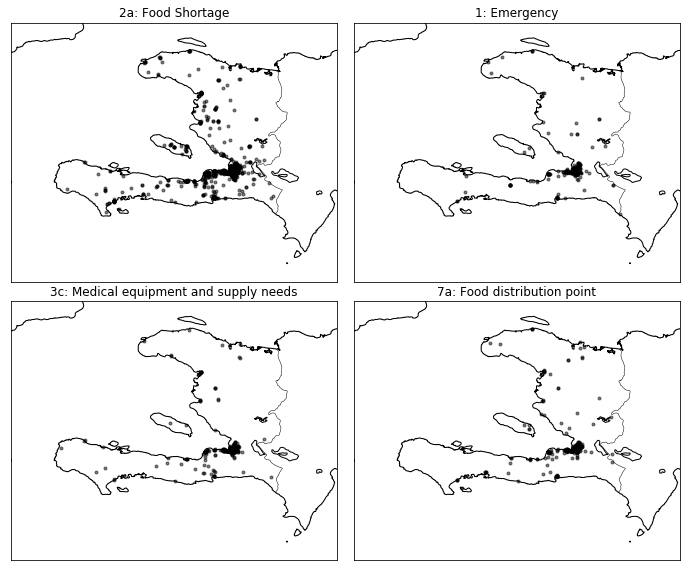

In [60]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
fig.subplots_adjust(hspace=0.05,wspace=0.05)
to_plot=['2a','1','3c','7a']
lllat=17.25
urlat=20.25
lllon=-75
urlon=-71
for code,ax in zip(to_plot,axes.flat):
    m = basic_haiti_map(ax,lllat=lllat,urlat=urlat,lllon=lllon,urlon=urlon)
    cat_data = data[data['category_%s'%code]==1]
    # 计算地图的投影坐标
    x,y = m(cat_data.LONGITUDE.values,cat_data.LATITUDE.values)
    m.plot(x,y,'k.',alpha=0.5)
    ax.set_title('%s: %s'%(code,english_mapping[code]))

In [59]:
shapefile_path = 'D:/AnalysisDataWithPython/data/dataSets/haiti/PortAuPrince_Roads/PortAuPrince_Roads'